In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [3]:
N = 1000

x1 = np.random.randn(N,1)
w = np.random.randn(N,1)

# Função objetivo.
y = x1

# Função observável (ruidosa)
y_noisy = y + w

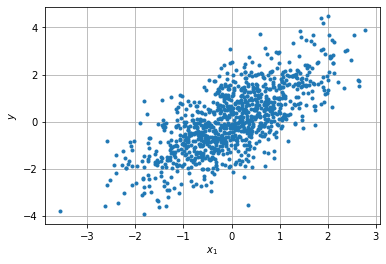

In [4]:
plt.plot(x1,y_noisy,'.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [5]:
def calculateErrorSurface(y, x1):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-2.0, 4.0, N)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,1))
    for k in range(0, N):
            yhat = a1[k]*x1
            J[k] = (1.0/len(y))*np.sum(np.square(y - yhat));            
            
    return J, a1

In [6]:
# Equação normal.
a_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

yhat = a_opt*x1

Joptimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))

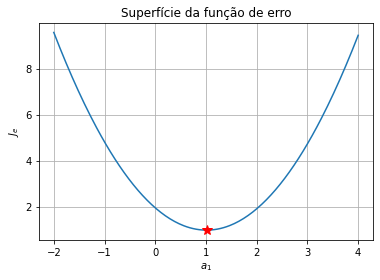

In [7]:
J, a1 = calculateErrorSurface(y_noisy, x1)

# Plot cost-function surface.
plt.figure()
plt.plot(a1, J)
plt.plot(a_opt, Joptimum, c='r', marker='*', markersize=10)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Superfície da função de erro')
plt.grid()
plt.savefig("error_surface_example1.png", dpi=600)

# Show the plot.
plt.show()

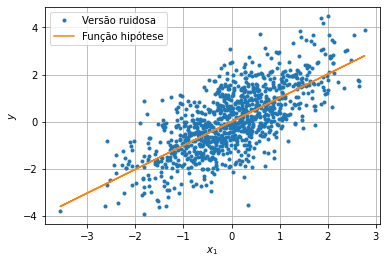

In [13]:
y_pred = a_opt*x1

plt.plot(x1,y_noisy,'.', label='Versão ruidosa')
plt.plot(x1,y_pred, label='Função hipótese')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.legend()
plt.show()